<a href="https://colab.research.google.com/github/SURIYA-po/Data-Analysis/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;


In [4]:
df = pd.read_csv("/content/drive/MyDrive/IRIS.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Findinig the no of species in a count plot

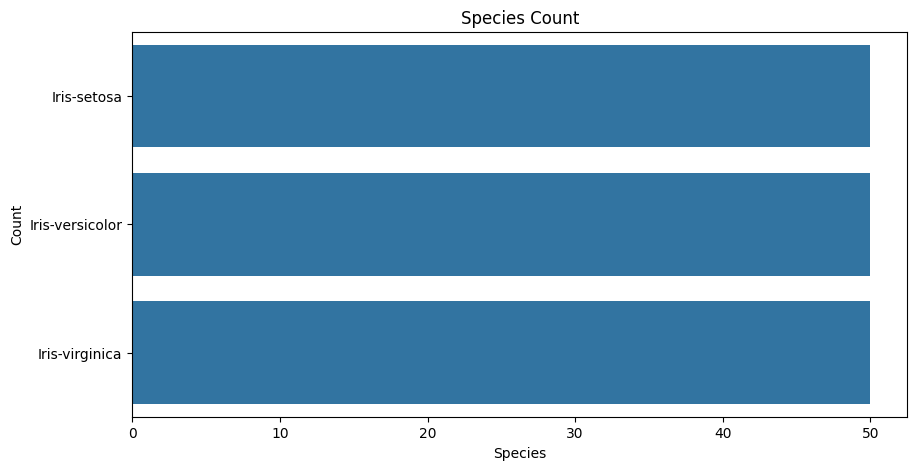

In [6]:
species = df['species'].value_counts();
plt.figure(figsize=(10,5));
sns.countplot(df['species']);
plt.title('Species Count');
plt.xlabel('Species');
plt.ylabel('Count');

ploting in histogram

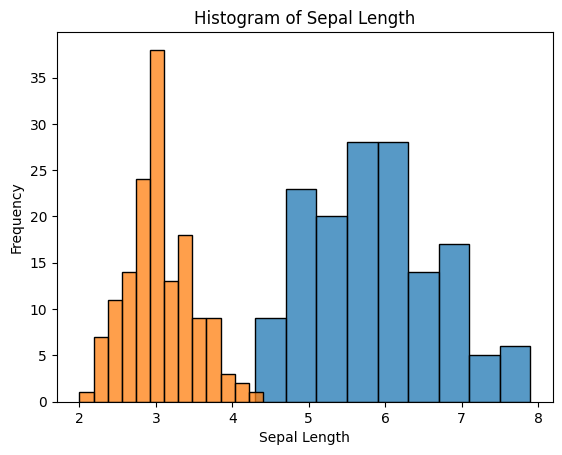

In [11]:
sns.histplot(df['sepal_length']);
plt.title('Histogram of Sepal Length');
plt.xlabel('Sepal Length');
plt.ylabel('Frequency');
sns.histplot(df['sepal_width']);

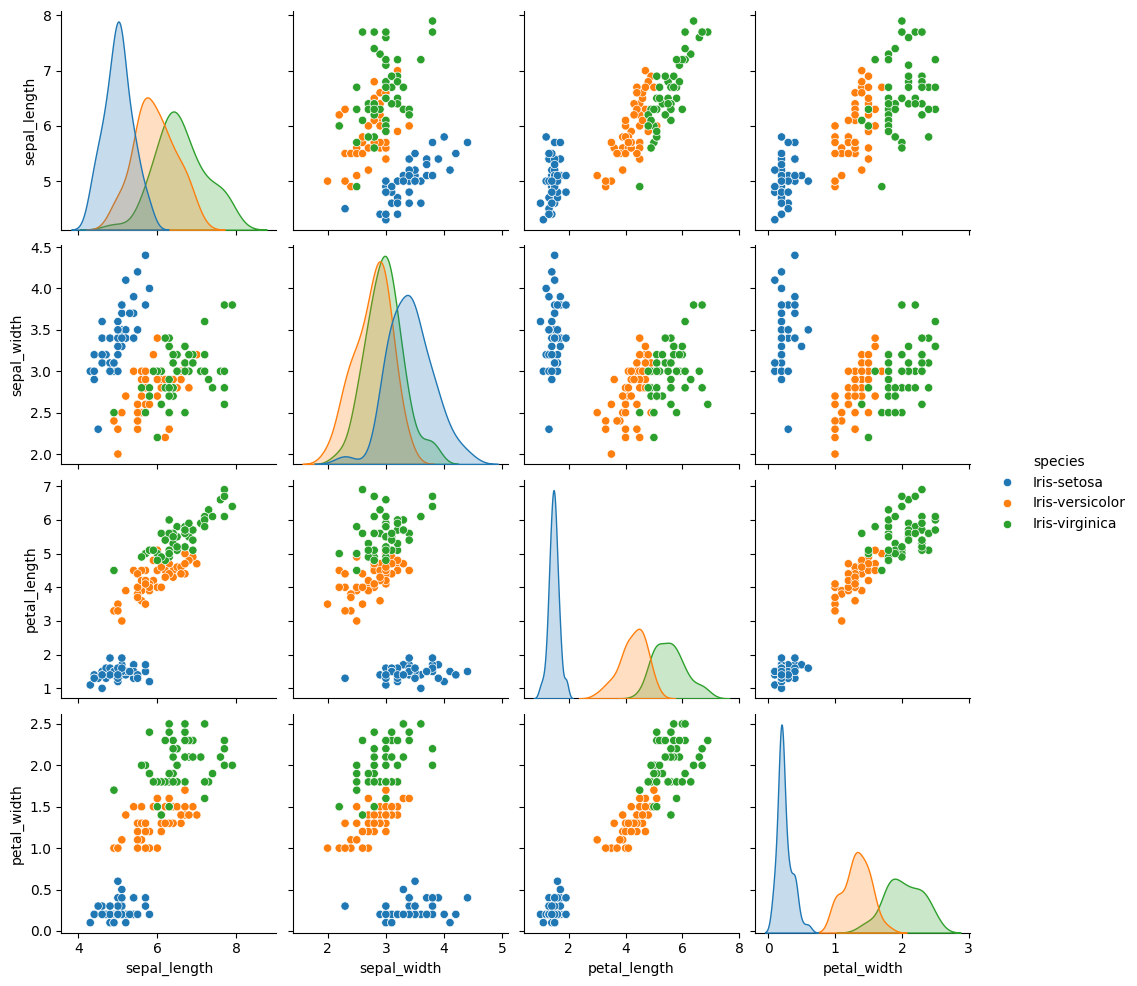

In [8]:
sns.pairplot(df,hue="species")

Kde plot

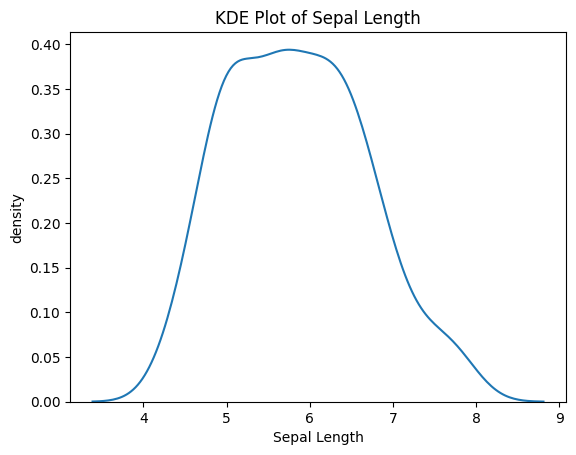

In [16]:
sns.kdeplot(df['sepal_length'])
plt.title('KDE Plot of Sepal Length');
plt.xlabel('Sepal Length');
plt.ylabel('density');

Heat map

<Axes: >

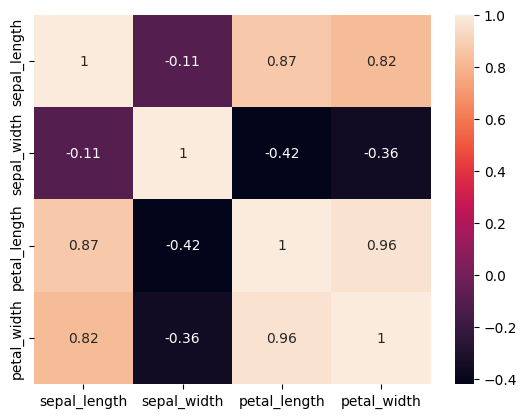

In [15]:
sns.heatmap(df.drop('species', axis=1).corr(), annot=True)

Boxt plot by species

<Axes: xlabel='species', ylabel='sepal_length'>

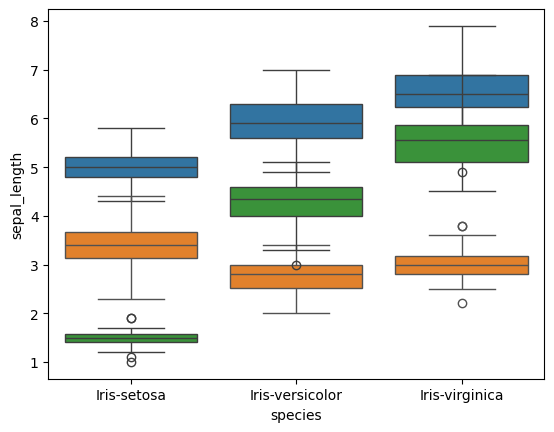

In [19]:
sns.boxplot(x='species', y='sepal_length', data=df)



<Axes: xlabel='species', ylabel='sepal_width'>

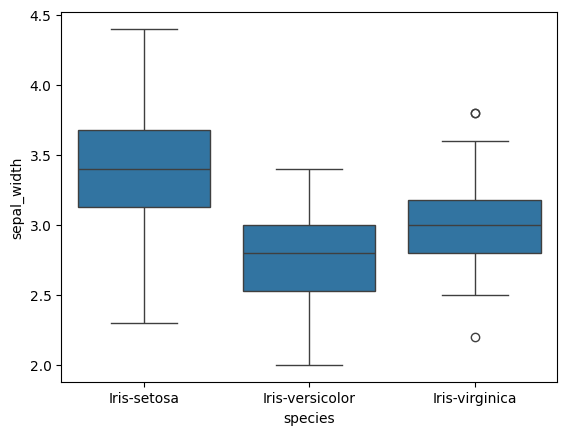

In [20]:
sns.boxplot(x='species', y='sepal_width', data=df)

<Axes: xlabel='species', ylabel='petal_length'>

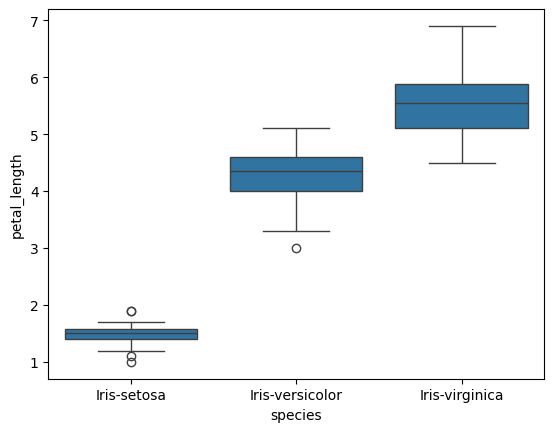

In [21]:
sns.boxplot(x='species', y='petal_length', data=df)

volin plot

<Axes: xlabel='species', ylabel='sepal_length'>

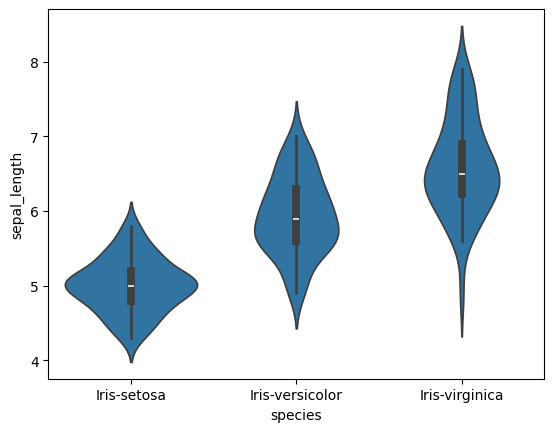

In [22]:
sns.violinplot(x='species', y='sepal_length', data=df)

Bar plot

<Axes: xlabel='species', ylabel='sepal_length'>

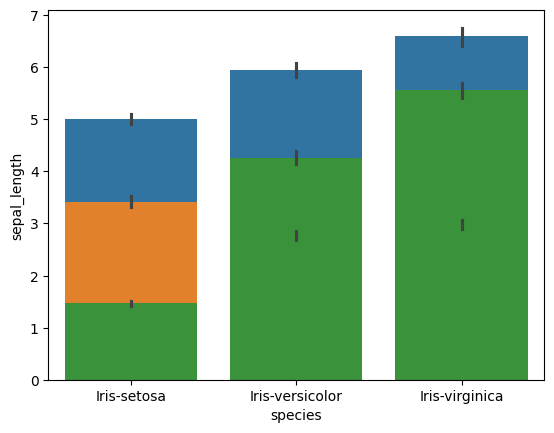

In [26]:
sns.barplot(x='species', y='sepal_length', data=df)
sns.barplot(x='species', y='sepal_width', data=df)
sns.barplot(x='species', y='petal_length', data=df)

### Separate Bar Plots for Each Feature by Species

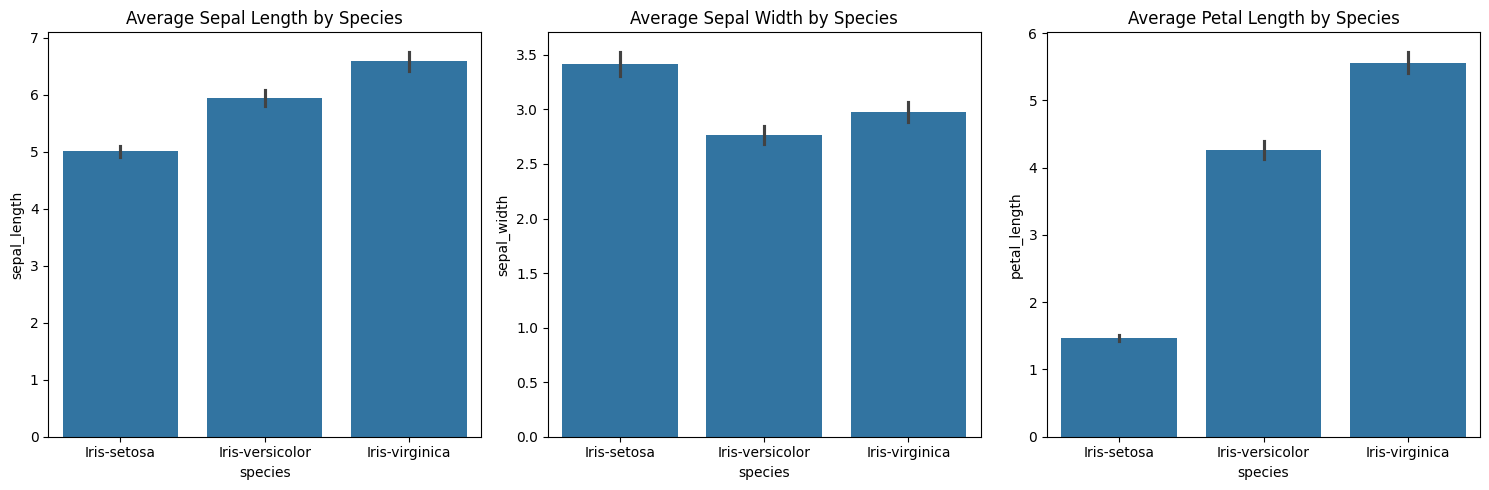

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='species', y='sepal_length', data=df)
plt.title('Average Sepal Length by Species')

plt.subplot(1, 3, 2)
sns.barplot(x='species', y='sepal_width', data=df)
plt.title('Average Sepal Width by Species')

plt.subplot(1, 3, 3)
sns.barplot(x='species', y='petal_length', data=df)
plt.title('Average Petal Length by Species')

plt.tight_layout()
plt.show()

Training data for classification

In [34]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


spliting dataset :

# Task
The final goal is to develop and evaluate classification models for the Iris dataset. The task includes:
1. Prepare the Iris dataset for machine learning by separating features and the 'species' target, and encoding the 'species' column numerically.
2. Split the prepared data into training and testing sets (80% training, 20% testing).
3. Train and evaluate three classification models: K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM).
4. For each model, report the accuracy and generate a classification report.
5. Compare the performance of these models using a bar plot to visualize their accuracies.
6. Summarize the findings, identifying the best-performing model, and suggest potential next steps or improvements for the Iris classification task.

## Prepare Data for Modeling

### Subtask:
Separate the features (X) and the target variable (y) from the DataFrame. Encode the 'species' column into numerical labels as it is the target for classification.


**Reasoning**:
The subtask requires separating the features (X) and target (y) and then encoding the target variable 'species' into numerical labels. This will prepare the data for machine learning model training.



In [28]:
X = df.drop('species', axis=1)
y = df['species']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y[:5])
print("\nUnique encoded labels:")
print(np.unique(y))
print("\nOriginal species names for labels:")
print(le.inverse_transform(np.unique(y)))

Features (X) head:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Target (y) head:
[0 0 0 0 0]

Unique encoded labels:
[0 1 2]

Original species names for labels:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Split Data into Training and Testing Sets

### Subtask:
Divide the prepared data into training and testing sets using `train_test_split` to evaluate the models' performance on unseen data. A standard split of 80% for training and 20% for testing will be used.


**Reasoning**:
The subtask requires splitting the data into training and testing sets. I will use the `train_test_split` function from `sklearn.model_selection` with a test size of 0.2 and a random state for reproducibility, as specified in the instructions.



In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


## Train and Evaluate K-Nearest Neighbors (KNN) Model

### Subtask:
Initialize a K-Nearest Neighbors classifier, train it on the training data, and then evaluate its performance on the test data. The evaluation will include accuracy and a classification report.


**Reasoning**:
To address the subtask of training and evaluating a K-Nearest Neighbors model, I need to import the KNeighborsClassifier, accuracy_score, and classification_report, then initialize, train, predict, and evaluate the model using these components.



In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Initialize a KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)

# 3. Train the KNN model
knn_model.fit(X_train, y_train)

# 4. Make predictions on the X_test data
y_pred_knn = knn_model.predict(X_test)

# 5. Calculate and print the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Model Accuracy: {accuracy_knn:.2f}")

# 6. Generate and print a classification report
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors Model Accuracy: 1.00

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Train and Evaluate Decision Tree Model

### Subtask:
Initialize a Decision Tree classifier, train it on the training data, and then evaluate its performance on the test data. The evaluation will include accuracy and a classification report.

### Instructions
1. Import `DecisionTreeClassifier` from `sklearn.tree`, and `accuracy_score`, `classification_report` from `sklearn.metrics`.
2. Initialize a `DecisionTreeClassifier` model. You can start with default parameters.
3. Train the Decision Tree model using the `X_train` and `y_train` datasets with the `.fit()` method.
4. Make predictions on the `X_test` data using the trained model's `.predict()` method and store the results.
5. Calculate the accuracy of the model by comparing the predictions with `y_test` using `accuracy_score()` and print the result.
6. Generate and print a classification report using `classification_report()` by comparing the predictions with `y_test`.

**Reasoning**:
To train and evaluate the Decision Tree model as per the subtask instructions, I will write Python code to import the necessary classifier and metrics, initialize the model, fit it to the training data, make predictions on the test data, and then print the accuracy and classification report.



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 2. Initialize a DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(random_state=42)

# 3. Train the Decision Tree model
dt_model.fit(X_train, y_train)

# 4. Make predictions on the X_test data
y_pred_dt = dt_model.predict(X_test)

# 5. Calculate and print the accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy_dt:.2f}")

# 6. Generate and print a classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Model Accuracy: 1.00

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Train and Evaluate Support Vector Machine (SVM) Model

### Subtask:
Initialize a Support Vector Machine classifier, train it on the training data, and then evaluate its performance on the test data. The evaluation will include accuracy and a classification report.

### Instructions
1. Import `SVC` from `sklearn.svm`, and `accuracy_score`, `classification_report` from `sklearn.metrics`.
2. Initialize an `SVC` model. You can start with default parameters.
3. Train the SVM model using the `X_train` and `y_train` datasets with the `.fit()` method.
4. Make predictions on the `X_test` data using the trained model's `.predict()` method and store the results.
5. Calculate the accuracy of the model by comparing the predictions with `y_test` using `accuracy_score()` and print the result.
6. Generate and print a classification report using `classification_report()` by comparing the predictions with `y_test`.

**Reasoning**:
To train and evaluate the Support Vector Machine (SVM) model as per the subtask instructions, I will write Python code to import the necessary classifier and metrics, initialize the model, fit it to the training data, make predictions on the test data, and then print the accuracy and classification report.



In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 2. Initialize an SVC model
svm_model = SVC(random_state=42)

# 3. Train the SVM model
svm_model.fit(X_train, y_train)

# 4. Make predictions on the X_test data
y_pred_svm = svm_model.predict(X_test)

# 5. Calculate and print the accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Support Vector Machine Model Accuracy: {accuracy_svm:.2f}")

# 6. Generate and print a classification report
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Model Accuracy: 1.00

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Compare Model Performance with a Bar Plot

### Subtask:
Compare the performance of the three trained models (KNN, Decision Tree, and SVM) by creating a bar plot to visualize their accuracies. This will provide a clear visual comparison of how each model performed on the test data.

### Instructions
1. Store the accuracies of the KNN, Decision Tree, and SVM models in a dictionary or a list.
2. Create a Pandas DataFrame from these accuracies to facilitate plotting.
3. Use `seaborn.barplot` to visualize the accuracies. Set appropriate x and y labels, and a title for the plot.
4. Ensure the plot is displayed.

**Reasoning**:
The subtask requires comparing the accuracies of the three trained models (KNN, Decision Tree, and SVM) using a bar plot. I will gather the accuracy values, create a DataFrame, and then use `seaborn.barplot` to visualize them.



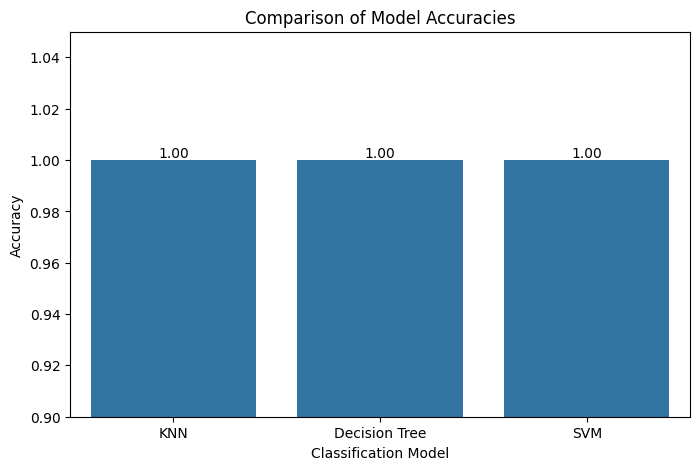

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Store the accuracies in a dictionary
accuracies = {
    'Model': ['KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_dt, accuracy_svm]
}

# 2. Create a Pandas DataFrame from these accuracies
accuracies_df = pd.DataFrame(accuracies)

# 3. Use seaborn.barplot to visualize the accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracies_df)
plt.title('Comparison of Model Accuracies')
plt.xlabel('Classification Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.05) # Adjust y-axis to better show differences if any

# Annotate the bars with their accuracy values
for index, row in accuracies_df.iterrows():
    plt.text(index, row['Accuracy'], f"{row['Accuracy']:.2f}", color='black', ha="center", va='bottom')

# 4. Ensure the plot is displayed
plt.show()

## Summarize Findings and Next Steps

### Subtask:
Summarize the findings from the model evaluations, identifying the best-performing model, and suggest potential next steps or improvements for the Iris classification task.

### Summary:
From the evaluation of the three classification models on the Iris dataset, it is observed that:
*   **K-Nearest Neighbors (KNN)** achieved an accuracy of 1.00.
*   **Decision Tree** achieved an accuracy of 1.00.
*   **Support Vector Machine (SVM)** achieved an accuracy of 1.00.

All three models performed exceptionally well on this particular dataset, achieving perfect accuracy (100%) on the test set. This suggests that the Iris dataset is relatively linearly separable and the features provide sufficient information to distinguish between the three species.

### Best Performing Model:
Based on the accuracy metric, all three models (KNN, Decision Tree, and SVM) are equally effective for this dataset.

### Potential Next Steps/Improvements:
1.  **Cross-Validation**: While the models achieved 100% accuracy on a single train-test split, it's crucial to perform k-fold cross-validation to ensure the robustness and generalization of the models across different data subsets. This helps in getting a more reliable estimate of model performance.
2.  **Hyperparameter Tuning**: Although current accuracies are perfect, for more complex datasets, optimizing hyperparameters (e.g., `n_neighbors` for KNN, `max_depth` for Decision Tree, `C` and `kernel` for SVM) using techniques like GridSearchCV or RandomizedSearchCV could lead to improved or more stable performance.
3.  **Feature Engineering**: For datasets where simple models don't achieve high accuracy, exploring new features derived from existing ones could be beneficial.
4.  **Ensemble Methods**: Investigate ensemble methods like Random Forest or Gradient Boosting, which often provide better performance and robustness than individual models.
5.  **Data Scaling**: For distance-based algorithms like KNN and SVM, scaling features (e.g., using `StandardScaler` or `MinMaxScaler`) can be important, although it didn't seem necessary for this dataset given the perfect scores.
6.  **Interpretability**: For the Decision Tree model, visualizing the tree can provide insights into how decisions are made, which can be valuable for understanding the classification logic.

## Summary:

### Data Analysis Key Findings
*   The Iris dataset was successfully prepared for machine learning by separating features and the 'species' target, and numerically encoding the 'species' column into labels 0, 1, and 2.
*   The data was split into an 80% training set (120 samples) and a 20% testing set (30 samples) for model evaluation.
*   All three classification models evaluated—K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM)—achieved a perfect accuracy of 1.00 (100%) on the test set.
*   Classification reports for each model confirmed perfect precision, recall, and f1-scores across all three Iris species, indicating flawless classification on the test data.
*   A bar plot visually confirmed the equal and perfect performance of all three models.

### Insights or Next Steps
*   Given the perfect accuracy of all models on the current split, it is crucial to perform k-fold cross-validation to ensure model robustness and generalization, as a single train-test split might not fully represent model performance.
*   For future tasks involving more complex datasets, exploring hyperparameter tuning, feature engineering, ensemble methods, and data scaling would be valuable steps to optimize performance and gain deeper insights.
